In [ ]:
# https://data.opendatasoft.com/explore/dataset/georef-australia-state%40public/export/?disjunctive.ste_code&disjunctive.ste_name
# credits OpenDataSoft

In [140]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors

In [48]:
hordeum_australia = pd.read_csv(r"./data/hordeum-2025-05-07/hordeum-2025-05-07.csv", low_memory=False)
australia = pd.read_csv(r"./data/georef-australia-state@public.csv", low_memory=False, sep=';')

In [49]:
os.listdir(r"./data/hordeum-2025-05-07/")

['citation.csv',
 'doi.txt',
 'headings.csv',
 'hordeum-2025-05-07.csv',
 'README.html']

In [50]:
with pd.option_context("display.max_rows", None):
    # print(pd.read_csv(r"./data/hordeum-2025-05-07/headings.csv").loc[:, ["Column name", "Field description"]])
    pass

In [51]:
# life stage
# Family  
# Genus  
# Subgenus  
# Specific Epithet
# Latitude  
# Longitude  
# Datum

In [52]:
hordeum_australia.columns[hordeum_australia.columns.str.contains("itude")]

Index(['decimalLatitude', 'decimalLongitude', 'verbatimLatitude',
       'verbatimLongitude'],
      dtype='object')

In [125]:
hordeum_tidied =  hordeum_australia.loc[:, ["country", "stateProvince", "day", "month", "year", "genus", "specificEpithet",
                              "decimalLatitude", "decimalLongitude"]].\
                                        dropna(subset=["specificEpithet", "decimalLatitude", "decimalLongitude"])

In [126]:
hordeum_tidied

,country,stateProvince,day,month,year,genus,specificEpithet,decimalLatitude,decimalLongitude
0,Australia,South Australia,16.0,12.0,1976.0,Hordeum,marinum,-35.050000,139.116667
1,Australia,Victoria,20.0,9.0,1978.0,Hordeum,glaucum,-35.850000,145.433333
2,Australia,Tasmania,NaN,6.0,1928.0,Hordeum,aegiceras,-42.883333,147.316667
3,Australia,Tasmania,1.0,12.0,1986.0,Hordeum,glaucum,-40.333333,148.066667
4,Australia,Tasmania,30.0,11.0,1986.0,Hordeum,glaucum,-40.316667,147.883333
...,...,...,...,...,...,...,...,...,...
2666,Australia,Victoria,1.0,11.0,2008.0,Hordeum,distichon,-37.316670,143.783330
2667,Australia,Victoria,22.0,11.0,1979.0,Hordeum,murinum,-36.933300,143.333300
2668,Australia,New South Wales,8.0,9.0,1931.0,Hordeum,glaucum,-33.216700,148.116700
2669,Australia,Victoria,1.0,9.0,2009.0,Hordeum,marinum,-36.495278,145.087500


In [59]:
australia.loc[:, "Iso 3166-2 Feature Code"]

0    NaN
1     WA
2     NT
3    VIC
4    NSW
5     SA
6    ACT
7    TAS
8    QLD
Name: Iso 3166-2 Feature Code, dtype: object

In [64]:
with open(r"./data/georef-australia-state@public.json", mode='r') as fp:
    ausgeo = json.load(fp=fp)

In [74]:
[(_.get("ste_iso3166_code", None), _.get("ste_name", None)) for _ in ausgeo]

[(None, ['Other Territories']),
 ('WA', ['Western Australia']),
 ('NT', ['Northern Territory']),
 ('VIC', ['Victoria']),
 ('NSW', ['New South Wales']),
 ('SA', ['South Australia']),
 ('ACT', ['Australian Capital Territory']),
 ('TAS', ['Tasmania']),
 ('QLD', ['Queensland'])]

In [88]:
ausgeo[1].get("geo_shape", "Oops!").get("geometry", "Welp!").keys()

dict_keys(['coordinates', 'type'])

In [114]:
ausgeo;

In [ ]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 16)
for state_or_territory in ausgeo:
    for coordinate_group in state_or_territory.get("geo_shape").get("geometry").get("coordinates"):
        for coordinate in coordinate_group:
            try:
                for (x, y) in coordinate:
                    axes.plot(x, y, marker='o', color="black", markersize=0.5)
            except TypeError:
                axes.plot(coordinate[0], coordinate[1], marker='o', color="black", markersize=0.5)
axes.scatter(hordeum_tidied.decimalLongitude, hordeum_tidied.decimalLatitude,
             c=hordeum_tidied.specificEpithet.astype("category").cat.codes.values)
plt.show()

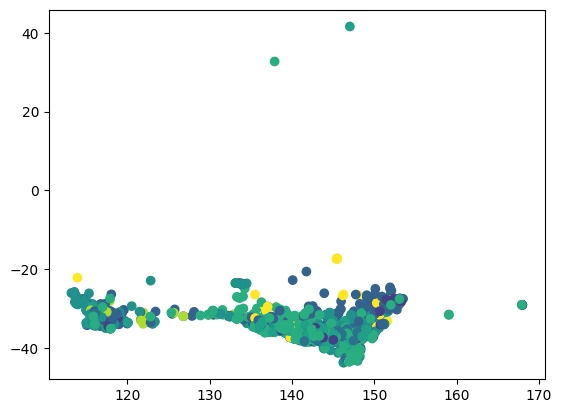

In [163]:
fig, axes = plt.subplots()
axes.scatter(hordeum_tidied.decimalLongitude, hordeum_tidied.decimalLatitude,
             c=hordeum_tidied.specificEpithet.astype("category").cat.codes.values)
# axes.legend()
plt.show()